### 前提
```
4種類の特徴量（説明変数）からアヤメの種類を推測する
アヤメの種類を分類 

使うアルゴリズム
- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使う
2次元の散布図を描き確認することができる

問題を単純化するためアヤメの種類を2つだけ使う

目的変数 3c2(3通り) と 特徴量 4c2(6通り) を選び方の組み合わせは合計18通り
目的変数の種類
    Iris setosa
    Iris virgicolor
    Iris virginica
特徴量の種類
    sepal_length
    sepal_width
    petal_length
    petal_width


実際の分析では特徴量を2つに絞るのは望ましくない。
そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われる。
Week3で利用した散布図行列を使い可視化することも可能。

データの分析まではPandasのDataFrameを使うが、scikit-learnはNumPyのndarrayを想定して作られている。
sklearnを使う段階でndarrayに変換を行う。
```

### 【課題1】練習のために特徴量とカテゴリを選択
```
virgicolor と virginica
sepal_length　と petal_length
```

In [58]:
from sklearn.datasets import load_iris
import pandas as pd
x = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
x = x.loc[:, ["sepal_length", "petal_length"]]
y = pd.Series(iris_dataset.target, name="y")
df_train = x.join(y).query('y in (1,2)')

### 【問題2】データの分析

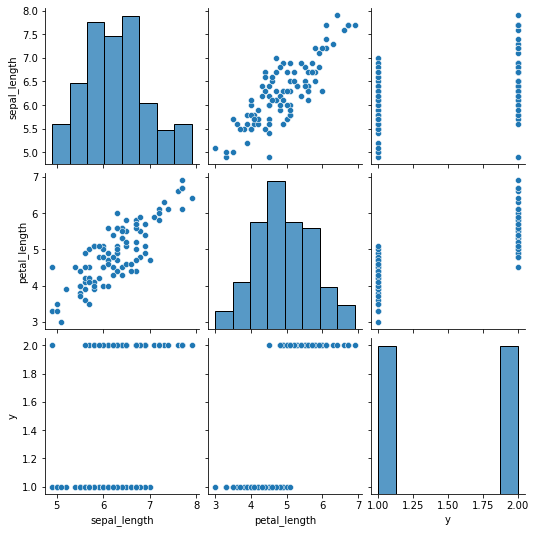

In [39]:
# 散布図
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(df_train)
plt.show()

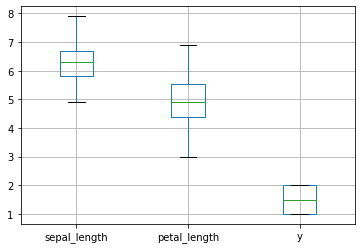

In [40]:
# 箱ひげ図（boxplot）
df_train.plot.box()
plt.grid()
plt.show()

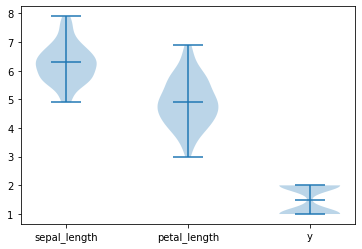

In [41]:
# バイオリン図（violinplot）
plt.violinplot(df_train, showmedians=True)
plt.xticks([1, 2, 3], df_train.columns.values)
plt.show()

### 【問題3】前処理・訓練データと検証データの分割

In [81]:
from sklearn.model_selection import train_test_split

x = df.drop(["y"],  axis=1)
y = df["y"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

### 【問題4】前処理・標準化

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### 【問題5】学習と推定

In [99]:
from sklearn.neighbors import KNeighborsClassifier

preds = []

for i in [1, 2, 3, 4, 5, 9]:
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(x_train, y_train) # 学習
    p = knc.predict(x_test) # 学習結果を元に予測
    print(f"{i}-nn {p}")
    preds.append(p)

1-nn [2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1]
2-nn [2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 2 1]
3-nn [2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]
4-nn [2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 2]
5-nn [2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]
9-nn [2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]


### 【問題6】評価

4種類の指標値の意味について簡単に調査して文章でまとめる
```
Accuracy（正解率）
    どれくらい成功していたかを表す単純な指標
    100個のデータが入力されたときに、90個のデータにおいて分類が成功した場合はその分類器のAccuracyは90%
    値が大きいほど精度が高い
    問題
        入力データに偏りがある場合、精度が高いにも関わらず、実際は低い場合がありうる

混合行列
    True Positiv(TP)
        予測値: Positive 真値:Positive
    False Positive (FP)
        予測値: Positive 真値:Negative
    False Negative (FN)
        予測値: Negative 真値:Positive
    True Negative (TN)
        予測値: Negative 真値:Negative
    
Precision（適合率）
    予測値がどれくらい正確であるか
    PrecisionとRecallはトレードオフの関係
    「Positiveと予測したデータ」のうち、本当にPositiveであった確率
    TP / (TP+NP)
Recall（再現率）
    予測値がどれくらい網羅できているか
    PrecisionとRecallはトレードオフの関係
    「Positiveなデータの」うち、Positiveだと予測された確率のことを指します。
    TP / (TP+FN)
F値
    PrecisionとRecallのバランスが良いことが良いモデルになるため、
    そのバランスを取りつつ評価ができる指標
    (2*Precision*Recall)/(Precision+Recall)
```

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

pred = preds[4]
print(y_test.values)
print(pred)

# scikit-learnを使い4種類の指標を計算するf
display(f1_score(y_test, pred))
display(recall_score(y_test, pred))
display(precision_score(y_test, pred, zero_division=1))
display(accuracy_score(y_test, pred))

# 混同行列をscikit-learnを使い表示する
cm = confusion_matrix(y_test, pred)
display(cm)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2]


0.0

0.0

0.0

0.84

array([[ 0,  0],
       [ 4, 21]])